### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data

# lapatinib
conc_l, pop_l, g2_l, g1_l, g1_0_l, g2_0_l = setup_data("lapatinib");

# doxorubicin
conc_d, pop_d, g2_d, g1_d, g1_0_d, g2_0_d = setup_data("doxorubicin");

# gemcitabine
conc_g, pop_g, g2_g, g1_g, g1_0_g, g2_0_g = setup_data("gemcitabine");

# paclitaxel
conc_t, pop_t, g2_t, g1_t, g1_0_t, g2_0_t = setup_data("paclitaxel");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:37


### Estimate 

In [5]:
# initial guess
initial_guess  = [0.02798, 0.025502, 21.3481, 10.2881, 0.0001, 0.0001]
include("DDEmodel.jl")
# bounds 
lower_bnd = [-6.0, -6.0, 2.0, 2.0, -8.0, -8.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]
bound = collect(zip(lower_bnd, upper_bnd))

# max number of steps
maxSteps = 1e4
parameters = zeros(4, 6, 8)
for j in 7:8
    parameters[1, :, j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, bound, maxSteps)
    parameters[2, :, j] = optimization(g1_d, g2_d, g1_0_d, g2_0_d, initial_guess, j, bound, maxSteps)
    parameters[3, :, j] = optimization(g1_g, g2_g, g1_0_g, g2_0_g, initial_guess, j, bound, maxSteps)
    parameters[4, :, j] = optimization(g1_t, g2_t, g1_0_t, g2_0_t, initial_guess, j, bound, maxSteps)
end

blackbox optim begins
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 27.34 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 365.78
Function evals per second = 369.80
Improvements/step = 0.21660
Total function evaluations = 10111


Best candidate found: [-3.76878, -3.01298, 3.39851, 2.0, -7.99995, -3.15906]

Fitness: 536.061312002

fitness before local optimization536.0613120018998
local optimization begins
the fitness after optimization458.89975243095273
blackbox optim begins
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 25.02 seconds
Termination reason: Max numb

In [3]:
using Plots;

# k shows the DDE parameter we want to look at the hill curve for
# k = 1: alpha
# k = 2: beta
# k = 3: tau1
# k = 4: tau2
# k = 5: gamma1
# k = 6: gamma2
k=6
p1 = plot(conc_l, parameters[1,k,:], label = "Lapatinib", title = "", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[1,k,:])/5 ,digits = 4):maximum(parameters[1,k,:]))
p2 = plot(conc_d, parameters[2,k,:], label = "Doxorubicin", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[2,k,:])/5, digits = 4):maximum(parameters[2,k,:]))
p3 = plot(conc_g, parameters[3,k,:], label = "Gemcitabine", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[3,k,:])/5, digits = 4):maximum(parameters[3,k,:]))
p4 = plot(conc_t, parameters[4,k,:], label = "Paclitaxel", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[4,k,:])/5, digits = 4):maximum(parameters[4,k,:]))
plot(p1, p2, p3, p4, dpi = 100)

ArgumentError: ArgumentError: range step cannot be zero

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at plot.jl:32
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/plot.jl:32


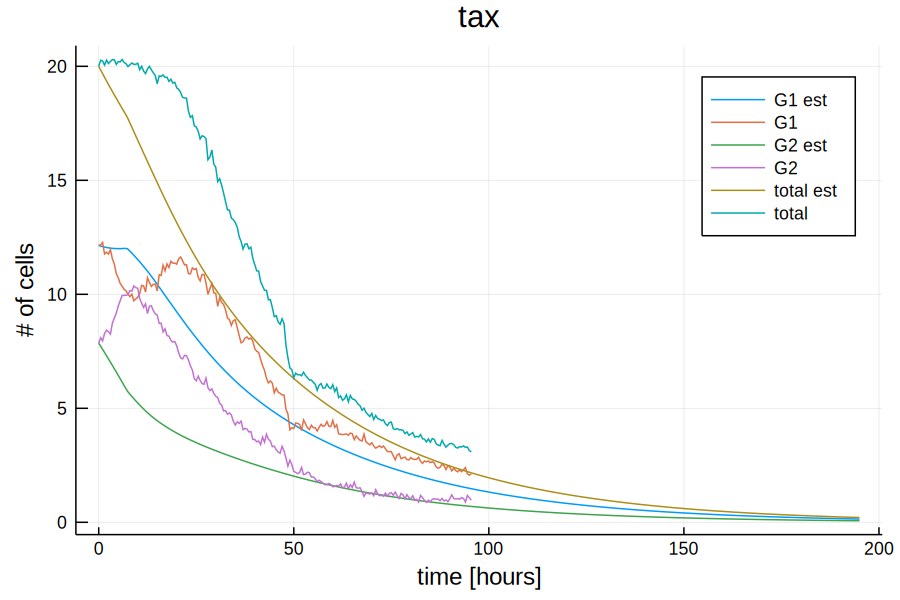

In [7]:
include("plot.jl")
# j showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
j = 8
plotIt(parameters[4, :, j], g1_t, g2_t, g2_0_t, g1_0_t, pop_t, j, "tax")